In [1]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the dataset
data = pd.read_csv(r"C:\Users\srush\OneDrive\Desktop\IIT Chicago\ACS\Project\combined_data.csv")

# Step 2: Encode categorical labels if 'Label' exists in the data
if 'Label' in data.columns:
    label_encoder = LabelEncoder()
    data['Label'] = label_encoder.fit_transform(data['Label'])

# Step 3: Convert all columns to numeric, handling any non-numeric data
data = data.apply(pd.to_numeric, errors='coerce')
data = data.fillna(0)  # Fill NaNs, which may arise from non-numeric conversion

# Step 4: Replace infinite values (if any) with NaN and then fill with 0
data.replace([float('inf'), float('-inf')], float('nan'), inplace=True)
data.fillna(0, inplace=True)

# Step 5: Save the label column (if it exists) and drop it for anomaly detection
if 'Label' in data.columns:
    labels = data['Label']  # Save the labels separately
    data = data.drop(columns=['Label'])
else:
    labels = None  # If no 'Label' column exists, labels is set to None

# Step 6: Fit Isolation Forest on the data
isolation_forest = IsolationForest(contamination=0.05, random_state=42)
data['Anomaly'] = isolation_forest.fit_predict(data)

# Step 7: Map Isolation Forest results to meaningful labels
# -1 (anomalous) to 1 (Malicious) and 1 (normal) to 0 (Normal)
data['Anomaly'] = data['Anomaly'].apply(lambda x: 1 if x == -1 else 0)

# Optional: Restore the original labels to the dataset (if labels exist)
if labels is not None:
    data['Label'] = labels

# Step 8: Save the processed and labeled data to a new CSV file
data.to_csv('processed_labeled_data.csv', index=False)

print("Anomaly detection complete. Labeled data saved as 'processed_labeled_data.csv'")


Anomaly detection complete. Labeled data saved as 'processed_labeled_data.csv'


In [5]:
data = pd.concat( 
    map(pd.read_csv, ['combined_data.csv', 'processed_labeled_data.csv']), ignore_index=True) 
print(data) 

       Destination Port   Flow Duration   Total Fwd Packets  \
0                 54865               3                   2   
1                 55054             109                   1   
2                 55055              52                   1   
3                 46236              34                   1   
4                 54863               3                   2   
...                 ...             ...                 ...   
4195                123        87016389                  14   
4196               5353        88491785                 270   
4197                123        64094119                   2   
4198                123        67016429                   7   
4199                123        69027645                   7   

       Total Backward Packets  Total Length of Fwd Packets  \
0                           0                           12   
1                           1                            6   
2                           1                            

## Model Development and Training:

In [7]:
from sklearn.metrics import classification_report, confusion_matrix

# Ensure 'Label' column is present for evaluation
if 'Label' in data.columns:
    # Assuming 'Anomaly' is the predicted label (0: normal, 1: malicious) from IsolationForest
    print("Classification Report:")
    print(classification_report(data['Label'], data['Anomaly']))

    print("Confusion Matrix:")
    print(confusion_matrix(data['Label'], data['Anomaly']))
else:
    print("No 'Label' column found for evaluation.")


No 'Label' column found for evaluation.


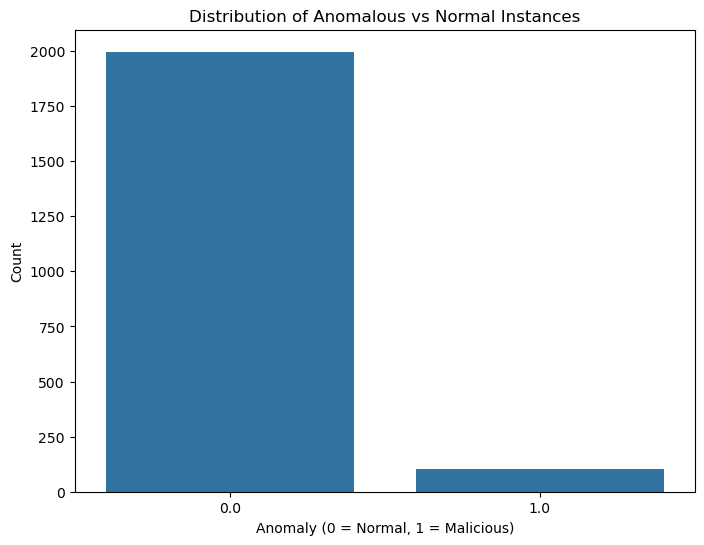

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of normal vs anomalous instances
plt.figure(figsize=(8, 6))
sns.countplot(x='Anomaly', data=data)
plt.title('Distribution of Anomalous vs Normal Instances')
plt.xlabel('Anomaly (0 = Normal, 1 = Malicious)')
plt.ylabel('Count')
plt.show()


C:\Users\srush\AppData\Local\Temp\ipykernel_6128\3970811428.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Anomaly'] == 0]['Flow Duration'], label='Normal', shade=True)
C:\Users\srush\AppData\Local\Temp\ipykernel_6128\3970811428.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Anomaly'] == 1]['Flow Duration'], label='Anomalous', shade=True)


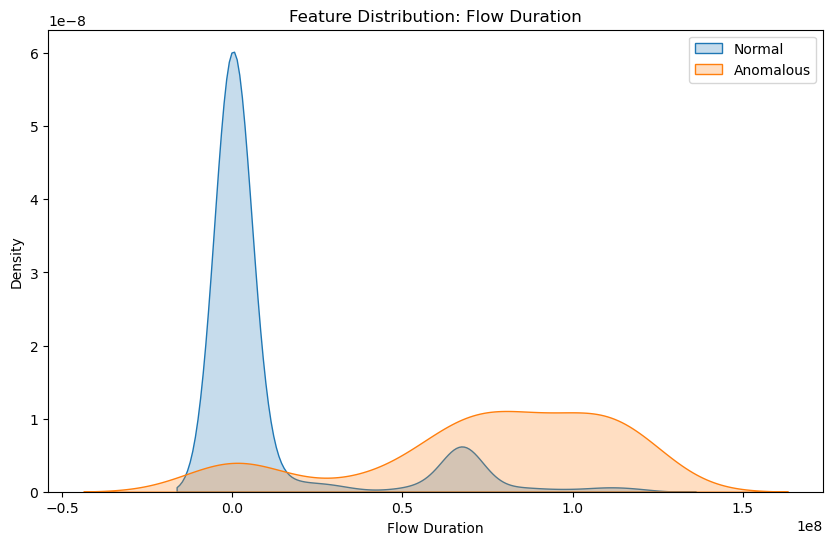

In [17]:
# Visualize the distribution of a few key features for normal vs anomalous data
plt.figure(figsize=(10, 6))
sns.kdeplot(data[data['Anomaly'] == 0]['Flow Duration'], label='Normal', shade=True)
sns.kdeplot(data[data['Anomaly'] == 1]['Flow Duration'], label='Anomalous', shade=True)
plt.title('Feature Distribution: Flow Duration')
plt.xlabel('Flow Duration')
plt.ylabel('Density')
plt.legend()
plt.show()

C:\Users\srush\AppData\Local\Temp\ipykernel_6128\525670260.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Anomaly'] == 0][feature], label='Normal', shade=True)
C:\Users\srush\AppData\Local\Temp\ipykernel_6128\525670260.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Anomaly'] == 1][feature], label='Anomalous', shade=True)
C:\Users\srush\AppData\Local\Temp\ipykernel_6128\525670260.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Anomaly'] == 0][feature], label='Normal', shade=True)
C:\Users\srush\AppData\Local\Temp\ipykernel_6128\525670260.py:17: FutureWarning: 

`shade` is 

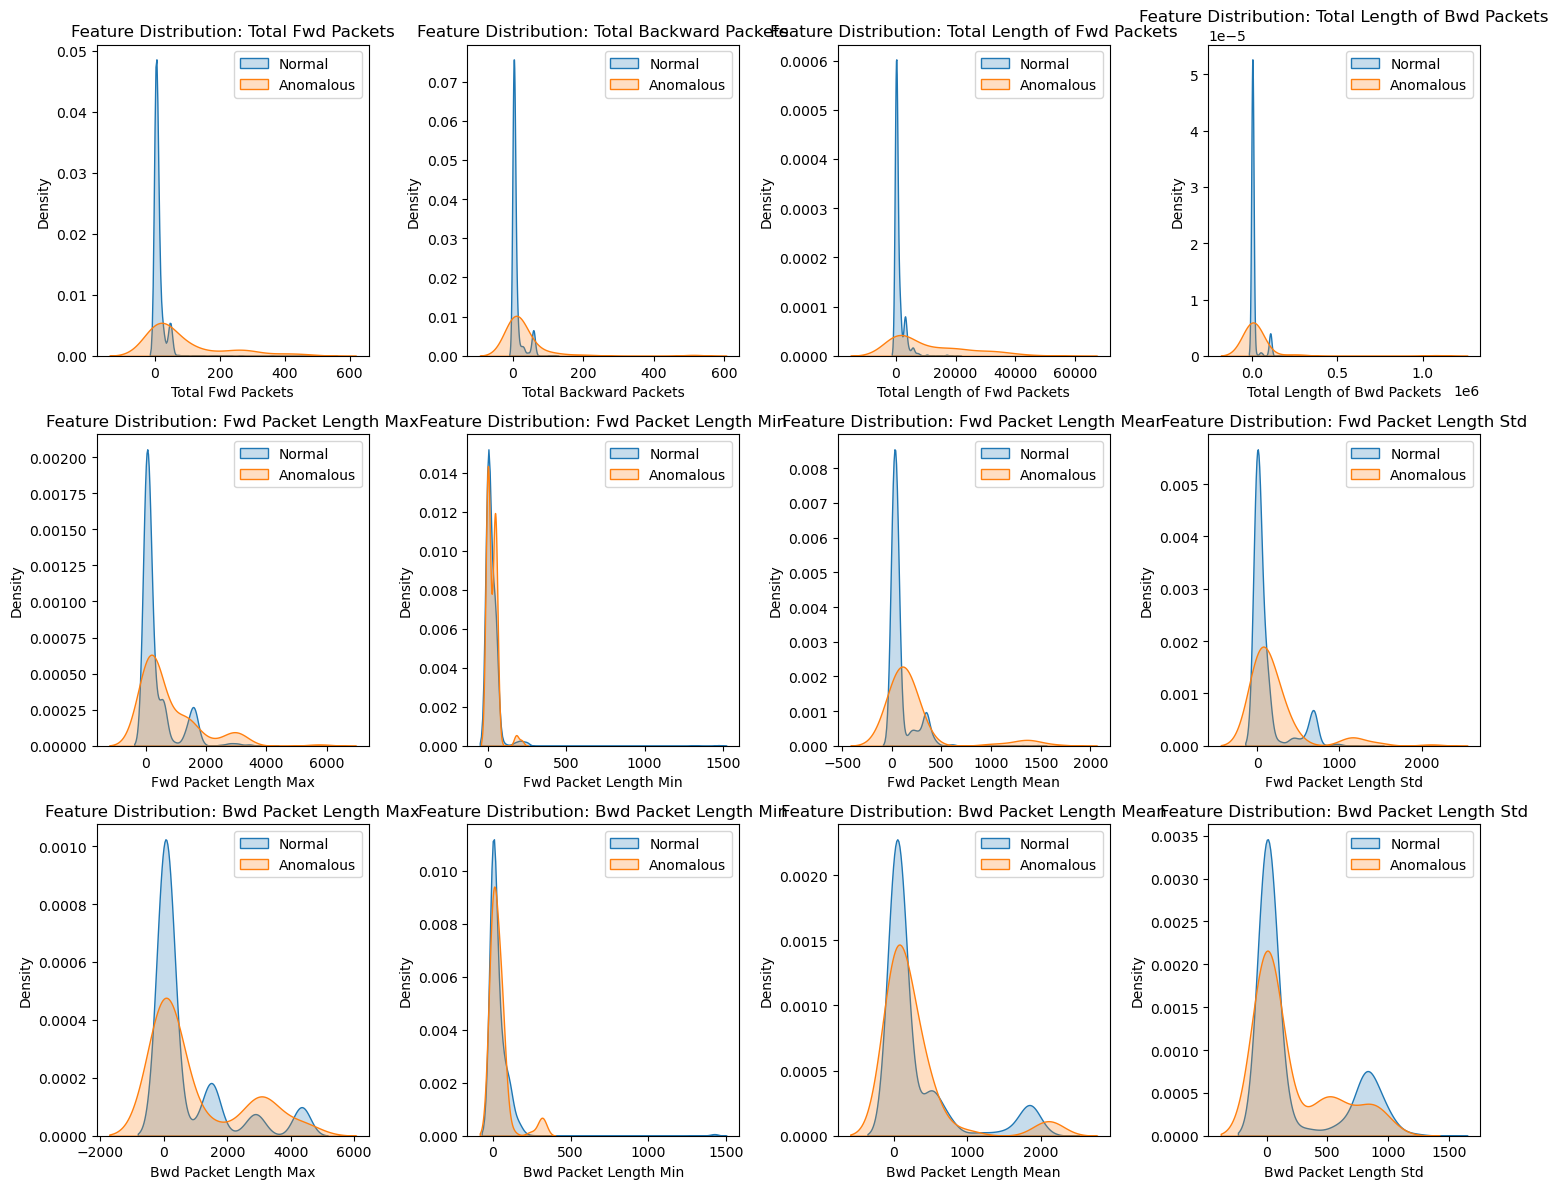

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of features to visualize
features = ['Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets',
            'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min',
            'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max',
            'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std']

# Set up the figure for plotting
plt.figure(figsize=(15, 12))

# Iterate over the features to create individual plots
for i, feature in enumerate(features, 1):
    plt.subplot(3, 4, i)  # Create a grid of subplots (3 rows and 4 columns)
    sns.kdeplot(data[data['Anomaly'] == 0][feature], label='Normal', shade=True)
    sns.kdeplot(data[data['Anomaly'] == 1][feature], label='Anomalous', shade=True)
    plt.title(f'Feature Distribution: {feature}')
    plt.legend()

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


In [23]:
features.replace([np.inf, -np.inf], np.nan, inplace=True)
features.fillna(features.mean(), inplace=True)

# Check again after replacing NaN and infinity
print(features.isna().sum())

# Handle large values by capping if necessary
features = features.clip(upper=1e6)  # You can adjust this threshold

# Step 2: Normalize the data (standardize)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Active Min                     0
Idle Mean                      0
Idle Std                       0
Idle Max                       0
Idle Min                       0
Length: 78, dtype: int64


C:\Users\srush\AppData\Local\Temp\ipykernel_6128\1493261430.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Anomaly_Predicted'] == 1]['Flow Duration'], label='Normal', shade=True)
C:\Users\srush\AppData\Local\Temp\ipykernel_6128\1493261430.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Anomaly_Predicted'] == -1]['Flow Duration'], label='Anomalous', shade=True)


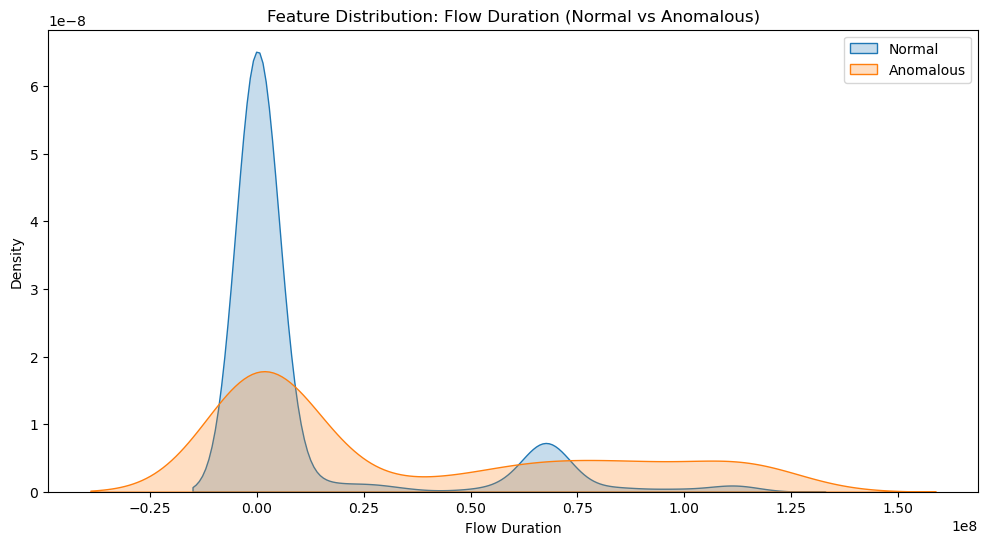

In [26]:
svm = OneClassSVM(kernel='rbf', nu=0.1, gamma='scale')
svm.fit(scaled_features)

# Step 4: Predict anomalies
predictions = svm.predict(scaled_features)

# Step 5: Visualize the results
data['Anomaly_Predicted'] = predictions

# Visualize the feature distribution with predicted anomalies
plt.figure(figsize=(12, 6))
sns.kdeplot(data[data['Anomaly_Predicted'] == 1]['Flow Duration'], label='Normal', shade=True)
sns.kdeplot(data[data['Anomaly_Predicted'] == -1]['Flow Duration'], label='Anomalous', shade=True)
plt.title('Feature Distribution: Flow Duration (Normal vs Anomalous)')
plt.legend()
plt.show()

## Variational Autoencoders (VAE) for anomaly detection

In [33]:
pip install tensorflow

  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl.metadata (4.9 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.67.1-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached ml_dtypes-0.4.1-cp312-cp312-win_amd64.whl.metadata (20 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.w

ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\srush\\anaconda3\\Lib\\site-packages\\tensorflow\\python\\_pywrap_tensorflow_internal.pyd'
Consider using the `--user` option or check the permissions.



In [35]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Define the encoder part of the VAE
def build_encoder(input_dim, latent_dim):
    inputs = layers.Input(shape=(input_dim,))
    h = layers.Dense(128, activation='relu')(inputs)
    h = layers.Dense(64, activation='relu')(h)
    z_mean = layers.Dense(latent_dim)(h)
    z_log_var = layers.Dense(latent_dim)(h)
    
    # Sampling layer to sample z from z_mean and z_log_var
    z = layers.Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])
    
    encoder = models.Model(inputs, [z_mean, z_log_var, z], name="encoder")
    return encoder

# Define the decoder part of the VAE
def build_decoder(latent_dim, original_dim):
    latent_inputs = layers.Input(shape=(latent_dim,))
    h = layers.Dense(64, activation='relu')(latent_inputs)
    h = layers.Dense(128, activation='relu')(h)
    outputs = layers.Dense(original_dim, activation='sigmoid')(h)
    
    decoder = models.Model(latent_inputs, outputs, name="decoder")
    return decoder

# Sampling function for the VAE (to generate the latent space)
def sampling(args):
    z_mean, z_log_var = args
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

# Define the VAE model combining the encoder and decoder
def build_vae(input_dim, latent_dim):
    encoder = build_encoder(input_dim, latent_dim)
    decoder = build_decoder(latent_dim, input_dim)
    
    inputs = layers.Input(shape=(input_dim,))
    z_mean, z_log_var, z = encoder(inputs)
    reconstructed = decoder(z)
    
    vae = models.Model(inputs, reconstructed, name="vae")
    
    # Define VAE loss: reconstruction loss + KL divergence
    reconstruction_loss = tf.reduce_mean(tf.keras.losses.binary_crossentropy(inputs, reconstructed), axis=-1)
    reconstruction_loss *= input_dim  # To make the reconstruction loss scale with input dimension
    kl_loss = - 0.5 * tf.reduce_mean(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=-1)
    
    vae_loss = tf.reduce_mean(reconstruction_loss + kl_loss)
    
    vae.add_loss(vae_loss)
    vae.compile(optimizer='adam')
    
    return vae, encoder, decoder



In [41]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Check and handle NaN or infinite values in the features
features = data.select_dtypes(include=[np.number])

# Replace NaN with the column mean (or another imputation strategy if desired)
features = features.fillna(features.mean())

# Replace infinite values with large finite numbers (or remove them)
features.replace([np.inf, -np.inf], np.nan, inplace=True)

# Now handle NaN values if they still exist after replacing infinities
features = features.fillna(features.mean())

# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Split data into normal (training) and anomaly (testing) sets
normal_data = scaled_features[data['Label'] == 0]
anomaly_data = scaled_features[data['Label'] == 1]

print(f"Number of normal data points: {normal_data.shape[0]}")
print(f"Number of anomaly data points: {anomaly_data.shape[0]}")


Number of normal data points: 2100
Number of anomaly data points: 0


In [45]:
import tensorflow as tf
from tensorflow.keras.layers import Layer

# Define a custom layer to wrap the TensorFlow function
class MyTensorFlowFunctionLayer(Layer):
    def __init__(self):
        super(MyTensorFlowFunctionLayer, self).__init__()

    def call(self, inputs):
        # Define your TensorFlow function here
        # For example, let's assume your function is tf.math.square (this is just an example)
        return tf.square(inputs)

# Example usage in a Keras model:
from tensorflow.keras import Input, Model

# Define input layer
input_layer = Input(shape=(10,))  # Input shape (10,)
# Apply the custom layer to the input tensor
output_layer = MyTensorFlowFunctionLayer()(input_layer)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Print the model summary
model.summary()

# Now you can compile and fit the model as usual
model.compile(optimizer='adam', loss='mse')
# model.fit(...) # Your data and training process


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ my_tensor_flow_function_layer   │ (None, 10)             │             0 │
│ (MyTensorFlowFunctionLayer)     │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [49]:
from keras.layers import Input, Dense
from keras.models import Model
import tensorflow as tf
from tensorflow.keras import layers

class MyTensorFlowFunctionLayer(layers.Layer):
    def __init__(self):
        super(MyTensorFlowFunctionLayer, self).__init__()
        # Define a trainable weight (e.g., a weight matrix)
        self.kernel = self.add_weight(
            name='kernel', 
            shape=(10, 10),  # Example shape (input_size, output_size)
            initializer='random_normal', 
            trainable=True
        )

    def call(self, inputs):
        # Apply the TensorFlow function, and use the learnable weights
        return tf.matmul(inputs, self.kernel)  # Example operation: matrix multiplication

# Example usage in a Keras model:
input_layer = Input(shape=(10,))
x = MyTensorFlowFunctionLayer()(input_layer)  # Apply the custom layer
output_layer = Dense(1)(x)  # Use Dense layer after your custom layer

model = Model(inputs=input_layer, outputs=output_layer)

model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ my_tensor_flow_function_layer_2 │ (None, 10)             │           100 │
│ (MyTensorFlowFunctionLayer)     │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111 (444.00 B)

 Trainable params: 111 (444.00 B)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [68]:
pip install scikit-learn xgboost imbalanced-learn

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/124.9 MB 2.4 MB/s eta 0:00:52
   ---------------------------------------- 1.3/124.9 MB 3.5 MB/s eta 0:00:36
    --------------------------------------- 2.1/124.9 MB 3.6 MB/s eta 0:00:35
    --------------------------------------- 2.6/124.9 MB 3.4 MB/s eta 0:00:37
   - -------------------------------------- 3.7/124.9 MB 3.6 MB/s eta 0:00:34
   - -------------------------------------- 4.5/124.9 MB 3.7 MB/s eta 0:00:33
   - -------------------------------------- 5.2/124.9 MB 3.7 MB/s eta 0:00:33
   - -------------------------------------- 5.8/124.9 MB 3.5 MB/s eta 0:00:34
   -- ------------------------------------- 6.3/124.9 MB 3.5 MB/s eta 0:00:35
   -- ------------------------------------- 6.8/124.9 MB 3.4 MB/s eta 0:00:35
   -- ------------------------------------- 7.3/124.9 MB 3.4 MB/s eta 0:00:36
   -- ------------------------------------- 8.1/124.9 MB 3.4 MB/s eta 0

In [70]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

# Load your data (assuming it's already pre-processed)
# Example: X, y = features and labels
X = np.random.randn(1000, 80)  # Example, replace with your actual data
y = np.random.randint(0, 2, 1000)  # Example, binary labels

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': xgb.XGBClassifier(eval_metric='logloss')
}

# Train and evaluate models
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # for AUC-ROC
    
    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_prob)
    
    print(f"{name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC-ROC: {auc_roc:.4f}")



Training Logistic Regression...
Logistic Regression Performance:
Accuracy: 0.5050
Precision: 0.5455
Recall: 0.5000
F1-Score: 0.5217
AUC-ROC: 0.4918

Training Random Forest...
Random Forest Performance:
Accuracy: 0.4950
Precision: 0.5376
Recall: 0.4630
F1-Score: 0.4975
AUC-ROC: 0.4647

Training XGBoost...
XGBoost Performance:
Accuracy: 0.4850
Precision: 0.5248
Recall: 0.4907
F1-Score: 0.5072
AUC-ROC: 0.4690


In [72]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.metrics import confusion_matrix

# Example: X is the data used for anomaly detection
X_anomaly = np.random.randn(1000, 80)  # Example, replace with your actual data

# Define anomaly detection models
unsupervised_models = {
    'Isolation Forest': IsolationForest(),
    'One-Class SVM': OneClassSVM()
}

# Train and evaluate models
for name, model in unsupervised_models.items():
    print(f"\nTraining {name}...")
    model.fit(X_anomaly)
    
    # Predict anomalies
    y_pred_anomaly = model.predict(X_anomaly)
    
    # Convert predictions from {-1, 1} to {0, 1} for compatibility with metrics
    y_pred_anomaly = np.where(y_pred_anomaly == -1, 1, 0)  # 1 = anomaly, 0 = normal
    
    # Here, we'll assume `y_true_anomaly` is the ground truth for anomalies (you need this in real cases)
    y_true_anomaly = np.random.randint(0, 2, 1000)  # Replace with actual ground truth labels
    
    # Confusion Matrix
    tn, fp, fn, tp = confusion_matrix(y_true_anomaly, y_pred_anomaly).ravel()
    
    # Calculate False Positive Rate
    fpr = fp / (fp + tn)  # False Positive Rate
    
    # Anomaly Detection Score (mean of anomalies detected)
    anomaly_score = np.mean(y_pred_anomaly)
    
    print(f"{name} Performance:")
    print(f"Anomaly Detection Score: {anomaly_score:.4f}")
    print(f"False Positive Rate: {fpr:.4f}")



Training Isolation Forest...
Isolation Forest Performance:
Anomaly Detection Score: 0.0000
False Positive Rate: 0.0000

Training One-Class SVM...
One-Class SVM Performance:
Anomaly Detection Score: 0.4980
False Positive Rate: 0.4991


## Hyperparameter Tuning

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Example of Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Initialize GridSearchCV
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

# Fit the model with grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the best model on the test set
best_logreg = grid_search.best_estimator_
y_pred = best_logreg.predict(X_test)
print(classification_report(y_test, y_pred))


Best Hyperparameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.46      1.00      0.63        92
           1       0.00      0.00      0.00       108

    accuracy                           0.46       200
   macro avg       0.23      0.50      0.32       200
weighted avg       0.21      0.46      0.29       200



C:\Users\srush\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\srush\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\srush\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\srush\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver =

This will perform hyperparameter tuning for the logistic regression model, trying different combinations of penalty types, regularization strengths (C), and solvers. It uses 5-fold cross-validation to evaluate each combination.

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
import numpy as np

# Example of Random Forest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter distribution
param_dist = {
    'n_estimators': np.arange(50, 200, 50),
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest model
rf = RandomForestClassifier()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(rf, param_dist, n_iter=100, cv=5, verbose=2, random_state=42, scoring='accuracy')

# Fit the model with random search
random_search.fit(X_train, y_train)

# Get the best parameters
print("Best Hyperparameters:", random_search.best_params_)

# Evaluate the best model on the test set
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=50; t

RandomizedSearchCV will search through 100 random combinations of hyperparameters for the RandomForest model, evaluating each one using 5-fold cross-validation.

In [81]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Example of XGBoost
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Initialize the XGBoost model
xgb = XGBClassifier()

# Initialize GridSearchCV
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='accuracy', verbose=2)

# Fit the model with grid search
grid_search_xgb.fit(X_train, y_train)

# Get the best parameters
print("Best Hyperparameters:", grid_search_xgb.best_params_)

# Evaluate the best model on the test set
best_xgb = grid_search_xgb.best_estimator_
y_pred = best_xgb.predict(X_test)
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END

## Model Evaluation

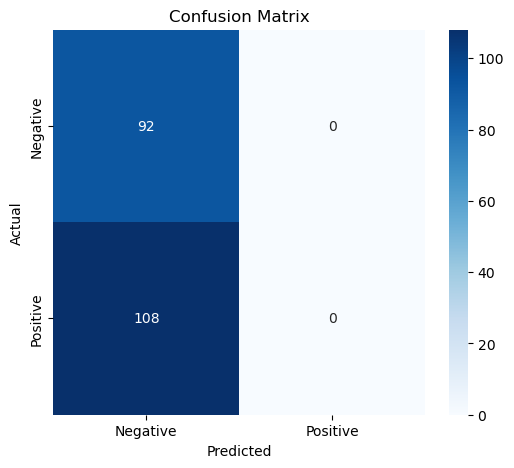

Classification Report:
               precision    recall  f1-score   support

           0       0.46      1.00      0.63        92
           1       0.00      0.00      0.00       108

    accuracy                           0.46       200
   macro avg       0.23      0.50      0.32       200
weighted avg       0.21      0.46      0.29       200



C:\Users\srush\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\srush\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\srush\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [84]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
import seaborn as sns
import matplotlib.pyplot as plt

# For supervised models, use y_test and y_pred
y_pred = best_logreg.predict(X_test)  # Use your trained model (e.g., best_logreg, best_rf, etc.)
y_pred_proba = best_logreg.predict_proba(X_test)[:, 1]  # For ROC and AUC

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))



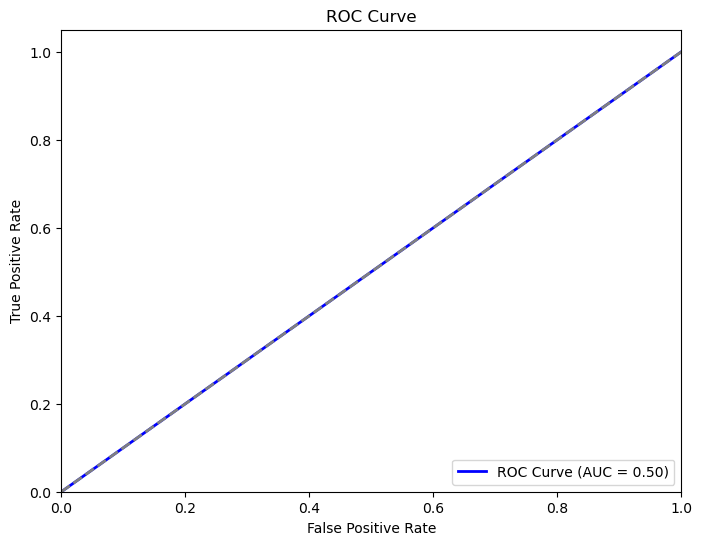

In [86]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


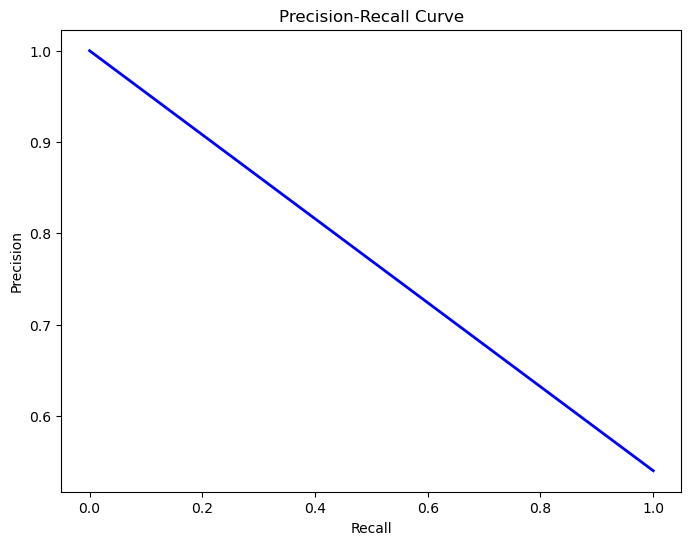

In [88]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


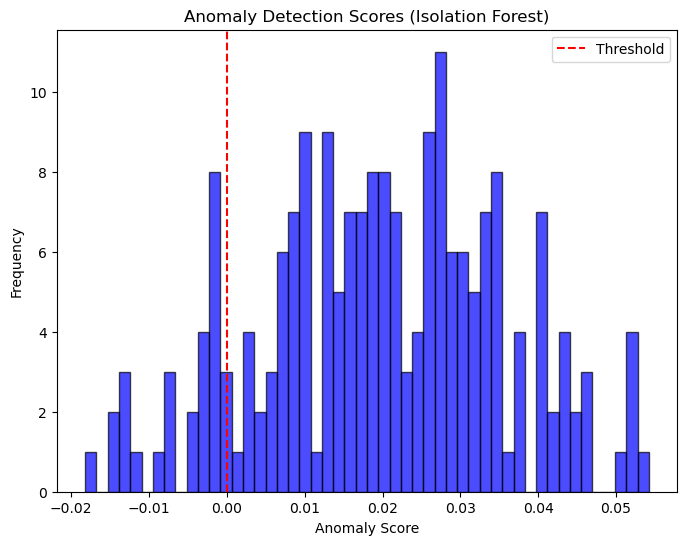

Anomaly Detection Report (Isolation Forest):
Anomaly Detection Score: 0.46


In [90]:
from sklearn.ensemble import IsolationForest

# Train the Isolation Forest
iso_forest = IsolationForest(contamination=0.1)  # Set contamination rate (expected percentage of anomalies)
iso_forest.fit(X_train)

# Get anomaly scores
y_pred_anomalies = iso_forest.decision_function(X_test)

# Plot Anomaly Scores and the Threshold
plt.figure(figsize=(8, 6))
plt.hist(y_pred_anomalies, bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--', label='Threshold')
plt.title('Anomaly Detection Scores (Isolation Forest)')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Use a threshold to classify anomalies
y_pred_labels = (y_pred_anomalies < 0).astype(int)  # Classify anomalies as 1, and normal as 0

# Evaluate the performance based on the threshold
print("Anomaly Detection Report (Isolation Forest):")
print("Anomaly Detection Score:", np.mean(y_pred_labels == y_test))  # Example score


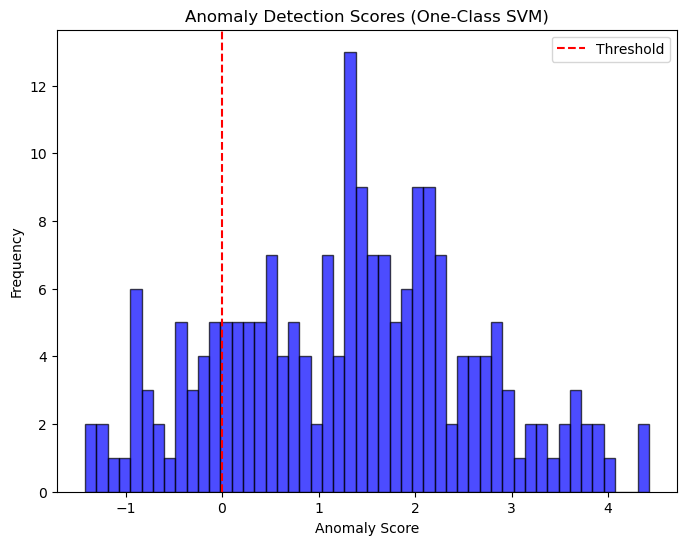

Anomaly Detection Report (One-Class SVM):
Anomaly Detection Score: 0.49


In [94]:
from sklearn.svm import OneClassSVM

# Train the One-Class SVM
oc_svm = OneClassSVM(nu=0.1, kernel="rbf", gamma="scale")
oc_svm.fit(X_train)

# Get anomaly scores
y_pred_anomalies_svm = oc_svm.decision_function(X_test)

# Plot Anomaly Scores and the Threshold
plt.figure(figsize=(8, 6))
plt.hist(y_pred_anomalies_svm, bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--', label='Threshold')
plt.title('Anomaly Detection Scores (One-Class SVM)')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Use a threshold to classify anomalies
y_pred_labels_svm = (y_pred_anomalies_svm < 0).astype(int)

# Evaluate the performance based on the threshold
print("Anomaly Detection Report (One-Class SVM):")
print("Anomaly Detection Score:", np.mean(y_pred_labels_svm == y_test))  # Example score


## Integration